In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('all.csv')

choc = df[df['product'] == 'CHOCOLATE']['mid_price']
strawb = df[df['product'] == 'STRAWBERRIES']['mid_price']
roses = df[df['product'] == 'ROSES']['mid_price']
basket = df[df['product'] == 'GIFT_BASKET']['mid_price']


combined = 6 * strawb + 4 * choc + roses

choc = choc.to_list()
strawb = strawb.to_list()
roses = roses.to_list()
basket = basket.to_list()

lis = [strawb[i]*6 + choc[i]*4 + roses[i] for i in range(len(strawb))]


# create new dataframe
df2 = pd.DataFrame()
df2['combined'] = lis
df2['combined'] = df2['combined'] + 380
df2['basket'] = basket


76.42310842343251 0.5095166666666666


<Axes: >

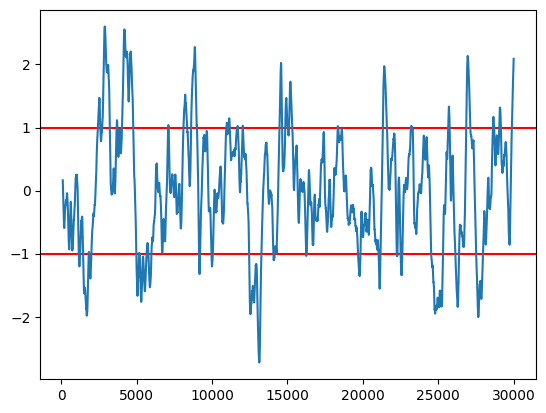

In [146]:
spread = df2['combined'] - df2['basket']
sd = np.std(spread)
mean = np.mean(spread)
print(sd, mean)
zscores = (spread - mean) / sd

# histogram
# plt.hist(df2['zscores'], bins=10)
# plt.xlabel('Z-Score')
# plt.ylabel('Frequency')

realz = zscores
zscores = zscores.rolling(window=100).mean()
plt.axhline(y=1, color='r', linestyle='-')
plt.axhline(y=-1, color='r', linestyle='-')
zscores.plot()

<Axes: >

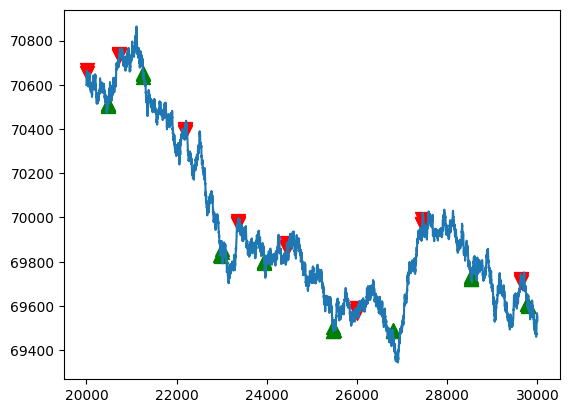

In [147]:
opens = [479.0, 480.0, 488.0, 489.0, 1251.0, 1252.0, 1253.0, 2973.0, 2974.0, 3005.0, 3010.0, 3945.0, 3946.0, 3947.0, 5477.0, 5478.0, 5479.0, 5480.0, 6791.0, 6792.0, 6793.0, 8530.0, 8536.0, 8537.0, 8538.0, 9780.0, 9781.0, 9782.0, 9783.0]
opens = [i + 20000 for i in opens]
closes = [9.0, 10.0, 728.0, 729.0, 730.0, 733.0, 2190.0, 2191.0, 2192.0, 2193.0, 3360.0, 3361.0, 3363.0, 4446.0, 4450.0, 4451.0, 5999.0, 6000.0, 6010.0, 7449.0, 7450.0, 7451.0, 7452.0, 9629.0, 9630.0, 9631.0]
closes = [i + 20000 for i in closes]



#plot opens as green triangles
plt.scatter(opens, df2['basket'][opens], color='g', marker='^', s=100)
#plot closes as red triangles
plt.scatter(closes, df2['basket'][closes], color='r', marker='v', s=100)
df2['basket'][20000:].plot()
# enable zooming in on plo

<Axes: >

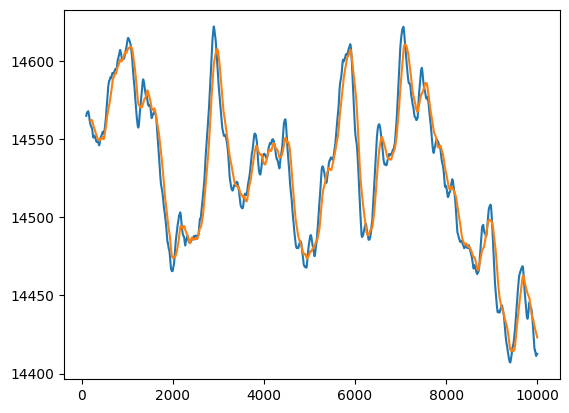

In [148]:
df3 = pd.DataFrame()
df3['rose'] = roses[10000:20000]
df3['rose'].rolling(window=100).mean().plot()
df3['rose'].rolling(window=250).mean().plot()